In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/ajmendez/Downloads/bank-additional/bank-additional-full.csv',
                 sep=';')

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
f_list = ['education','job','marital','contact',
          'campaign','duration','loan','poutcome']
sorted([(feature,metrics.adjusted_mutual_info_score(df[feature],df['y'])) 
         for feature in f_list],
       key=lambda x: x[1], reverse=True)

[('poutcome', 0.063974329495790822),
 ('contact', 0.017724409216299135),
 ('duration', 0.01235247012967758),
 ('job', 0.0047094532425354194),
 ('campaign', 0.0016892994224096314),
 ('marital', 0.0015227678571156829),
 ('education', 0.0013002646581772531),
 ('loan', -1.9812804868203938e-05)]

In [9]:
test_size=.33

pp_data = df.copy()
data_labels = pd.Series([0 if x == 'no' else 1 for x in df.ix[:,-1]])

# Scale numeric data
dts_cols = [0,10, 11, 12,13,15,16,17,18,19]
data_to_scale = pp_data.iloc[:, dts_cols].astype(np.float)  # change int to float
scaler = preprocessing.StandardScaler().fit(data_to_scale)
pp_data.iloc[:, dts_cols] = scaler.transform(data_to_scale)

# Create dummy encoding for categorical data
dtde_cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]
data_to_de = pp_data.iloc[:,dtde_cols]
de_data = pd.get_dummies(data_to_de)
pp_data.drop(pp_data.columns[dtde_cols], axis=1, inplace=True)
pp_data = pp_data.merge(de_data, how='inner',left_index=True, right_index=True, copy=False)

pp_data.drop('y',1,inplace=True)

X = pp_data.values
y = data_labels.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [10]:
pca = PCA(n_components=2)
pca.fit_transform(pp_data)

pca_df = pd.DataFrame(pca.components_,columns=pp_data.columns,index = ['PC-1','PC-2'])

np.abs(pca_df.max(axis=0)).sort_values(ascending=False) # regardless of sign


pdays                            0.597829
euribor3m                        0.474219
emp.var.rate                     0.471998
nr.employed                      0.451640
cons.price.idx                   0.362964
previous                         0.301984
poutcome_nonexistent             0.116694
contact_telephone                0.113103
cons.conf.idx                    0.103478
campaign                         0.096786
contact_cellular                 0.094763
marital_single                   0.058200
month_jul                        0.050922
default_unknown                  0.044991
month_apr                        0.042105
month_jun                        0.037294
poutcome_success                 0.036876
month_may                        0.033442
default_no                       0.025134
duration                         0.024252
marital_married                  0.023555
housing_yes                      0.023131
job_blue-collar                  0.022197
month_aug                        0

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 8 Text xticklabel objects>)

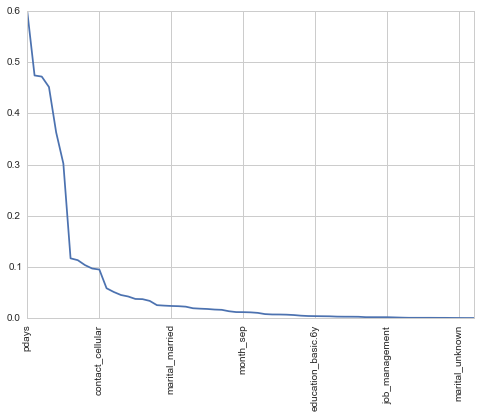

In [11]:
np.abs(pca_df.max(axis=0)).sort_values(ascending=False).plot()
plt.xticks(rotation='vertical')


In [12]:
cor = pp_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
(cor[(cor > 0.55) | (cor < -0.55)]).sort_values()


contact_telephone     contact_cellular   -1.000000
default_unknown       default_no         -0.999780
housing_yes           housing_no         -0.952819
poutcome_success      pdays              -0.950700
loan_yes              loan_no            -0.915840
poutcome_nonexistent  previous           -0.878776
                      poutcome_failure   -0.853119
marital_single        marital_married    -0.773785
contact_cellular      cons.price.idx     -0.591474
previous              pdays              -0.587514
contact_telephone     cons.price.idx      0.591474
poutcome_failure      previous            0.682608
euribor3m             cons.price.idx      0.688230
cons.price.idx        emp.var.rate        0.775334
nr.employed           emp.var.rate        0.906970
                      euribor3m           0.945154
euribor3m             emp.var.rate        0.972245
loan_unknown          housing_unknown     1.000000
dtype: float64

In [ ]:

t_X = pp_data.ix[:,:10].values # lets only use the standard scaled data

# perform t-SNE embedding
tsne = TSNE(n_components=2, init='random', random_state=0)
Y = tsne.fit_transform(t_X)


In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set3,s=30,alpha=.8)
